<a href="https://colab.research.google.com/github/AnantaNd/FuzzyLogic/blob/main/fuzzylogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import data excel

!gdown --id 1zZEAMrEEdbkkV3R7hopJEyztpQgN6K2p
file = pd.read_excel('Beasiswa.xlsx')


Downloading...
From: https://drive.google.com/uc?id=1zZEAMrEEdbkkV3R7hopJEyztpQgN6K2p
To: /content/Beasiswa.xlsx
100% 10.8k/10.8k [00:00<00:00, 20.2MB/s]


In [3]:
print(file)

     id  gaji  ipk
0     1    10  2.8
1     2     7  3.2
2     3    12  3.2
3     4    19  3.6
4     5    13  3.7
..  ...   ...  ...
95   96    11  2.3
96   97    12  2.6
97   98     7  2.7
98   99    17  3.4
99  100    15  2.6

[100 rows x 3 columns]


In [4]:
#fungsi keanggotaan
def trapesium(nilai,a,b,c,d):
  hasil = 0
  if (nilai <= a) or (nilai >= d):
    hasil = 0
  elif (a < nilai < b):
    hasil = ((nilai-a)/(b-a))
  elif (b <= nilai <= c):
    hasil = 1
  elif (c < nilai <= d):
    hasil = (-(nilai-d)/(d-c))
  return hasil


In [5]:
def segitiga(nilai, a, b, c):
  hasil = 0
  if(nilai <= a ) or (nilai >= c):
    hasil = 0
  elif (a < nilai <= b):
    hasil = (nilai-a)/(b-a)
  elif (b < nilai <= c):
    hasil = (-(nilai-c)/(c-b))
  
  return hasil

In [6]:
#fuzifikasi
def gaji(nilai):
  #batasan gaji
  #rendah < 6
  #sedang 6 - 10
  #tinggi 10 - 18
  #sangat tinggi > 18
  
  batas_gaji = [4, 6, 8, 10, 16, 18, 32]
  batas = batas_gaji

  rendah = trapesium(nilai, 0, 0, batas[0], batas[1])
  sedang = trapesium(nilai, batas[0], batas[1], batas[2], batas[3])
  tinggi = trapesium(nilai, batas[2], batas[3], batas[4], batas[5])
  sangat_tinggi = trapesium(nilai, batas[4], batas[5], batas[6], batas[6])

  return [rendah, sedang, tinggi, sangat_tinggi]

In [7]:
def fuzzy_gaji(data):
  hasil = [] #menampung hasil fuzzyfikasi
  for i in range(len(data)):
    temp = []
    temp = gaji(data["gaji"][i])
    hasil.append(temp)
  return hasil

In [8]:
#fuzzifikasi
def ipk(nilai):
  #batasan ipk
  #rendah < 2.2
  #sedang 2.2 - 3
  #tinggi > 3.5

  batas_ipk = [2.2, 3, 3.5, 6 ]
  batas = batas_ipk

  rendah = trapesium(nilai, 0, 0, batas[0], batas[1])
  sedang = segitiga(nilai, batas[0], batas[1], batas[2])
  tinggi = trapesium(nilai, batas[1], batas[2], batas[3], batas[3])
  
  return [rendah, sedang, tinggi]

In [9]:
def fuzzy_ipk(data):
  hasil = [] #menampung hasil fuzzyfikasi
  for i in range(len(data)):
    temp = []
    temp = ipk(data["ipk"][i])
    hasil.append(temp)
  return hasil

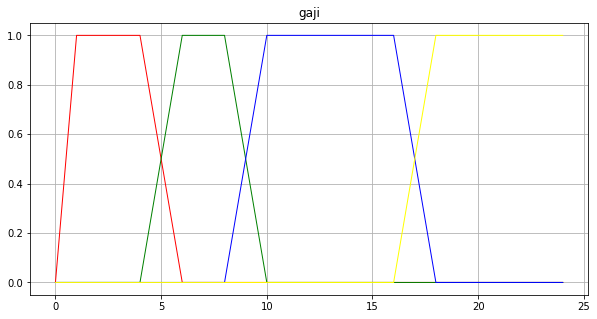

In [10]:
def plot_gaji():
  rendah = [gaji(i)[0] for i in range(25)]
  sedang = [gaji(i)[1] for i in range(25)]
  tinggi = [gaji(i)[2] for i in range(25)]
  sangat_tinggi = [gaji(i)[3] for i in range(25)]

  koor_x = np.arange(0, 25, 1)
  fig, ax = plt.subplots(nrows=1, figsize=(10,5))
  ax.plot(koor_x, rendah, 'red', linewidth=1, label='rendah')
  ax.plot(koor_x, sedang, 'green', linewidth=1, label='sedang')
  ax.plot(koor_x, tinggi, 'blue', linewidth=1, label='tinggi')
  ax.plot(koor_x, sangat_tinggi, 'yellow', linewidth=1, label='sangat_tinggi')

  ax.set_title("gaji")
  plt.grid()
  plt.show()

plot_gaji()


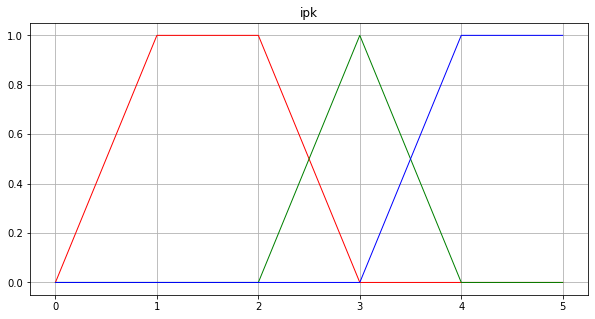

In [11]:
def plot_ipk():
  rendah = [ipk(i)[0] for i in range(6)]
  sedang = [ipk(i)[1] for i in range(6)]
  tinggi = [ipk(i)[2] for i in range(6)]

  koor_x = np.arange(0, 6, 1)
  fig, ax = plt.subplots(nrows=1, figsize=(10,5))
  ax.plot(koor_x, rendah, 'red', linewidth=1, label='rendah')
  ax.plot(koor_x, sedang, 'green', linewidth=1, label='sedang')
  ax.plot(koor_x, tinggi, 'blue', linewidth=1, label='tinggi')

  ax.set_title("ipk")
  plt.grid()
  plt.show()

plot_ipk()

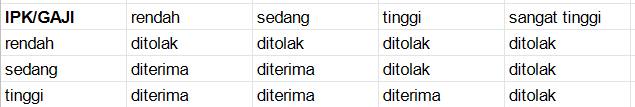

In [12]:
def inference(x, salary, gpa):
  hasil = []
  for i in range(len(x)):
    fuzz_gaji = salary[i]
    fuzz_ipk = gpa[i]

    ditolak = []
    diterima = []

    for x in range(len(fuzz_ipk)):
      temp = 0
      for y in range(len(fuzz_gaji)):
        if x == 0 and y == 0:
          temp = min(fuzz_gaji[y], fuzz_ipk[x])
          ditolak.append(temp)
        elif x == 0 and y == 1:
          temp = min(fuzz_gaji[y], fuzz_ipk[x])
          ditolak.append(temp)
        elif x == 0 and y == 2:
          temp = min(fuzz_gaji[y], fuzz_ipk[x])
          ditolak.append(temp)
        elif x == 0 and y == 3:
          temp = min(fuzz_gaji[y], fuzz_ipk[x])
          ditolak.append(temp)
        elif x == 1 and y == 0:
          temp = min(fuzz_gaji[y], fuzz_ipk[x])
          diterima.append(temp)
        elif x == 1 and y == 1:
          temp = min(fuzz_gaji[y], fuzz_ipk[x])
          diterima.append(temp)
        elif x == 1 and y == 2:
          temp = min(fuzz_gaji[y], fuzz_ipk[x])
          ditolak.append(temp)
        elif x == 1 and y == 3:
          temp = min(fuzz_gaji[y], fuzz_ipk[x])
          ditolak.append(temp)
        elif x == 2 and y == 0:
          temp = min(fuzz_gaji[y], fuzz_ipk[x])
          diterima.append(temp)
        elif x == 2 and y == 1:
          temp = min(fuzz_gaji[y], fuzz_ipk[x])
          diterima.append(temp)
        elif x == 2 and y == 2:
          temp == min(fuzz_gaji[y], fuzz_ipk[x])
          diterima.append(temp)
        elif x == 2 and y == 3:
          temp = min(fuzz_gaji[y], fuzz_ipk[x])
          ditolak.append(temp)
          
    hasil_ditolak = max(ditolak)
    #print("ditolak")
    #print(hasil_ditolak)
    hasil_diterima = max(diterima)
    #print("diterima")
    #print(hasil_diterima)

    hasil.append([hasil_ditolak,hasil_diterima])

  return hasil

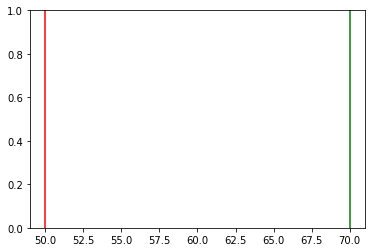

In [13]:
def plot_kelayakan():
  plt.axvline(50, 0, 1, color='red', label='ditolak')
  plt.axvline(70, 0, 1, color='green', label='diterima')
  plt.show()

plot_kelayakan()

In [14]:
def defuzzy(data): #sugeno
  hasil=[]
  for i in data:
    a = (i[0]*50) + (i[1]*70)
    b = i[0] + i[1]
    temp = (a+1)/(b+1) 
    hasil.append(temp)
  
  return hasil

In [15]:
def main():
  
  hasil_fuzz_gaji = fuzzy_gaji(file)
  #print("gaji")
  #print(hasil_fuzz_gaji)

  hasil_fuzz_ipk = fuzzy_ipk(file)
  #print("ipk" )
  #print(hasil_fuzz_ipk)

  hasil_inferen = inference(file, hasil_fuzz_gaji, hasil_fuzz_ipk)
  hasil_defuzi = defuzzy(hasil_inferen)
  result=file["score"] = hasil_defuzi
  result= file.sort_values(by="score", ascending=False)
  return result


main()

,id,gaji,ipk,score
47,48,7,4.0,35.5
77,78,3,4.0,35.5
63,64,2,3.8,35.5
62,63,2,3.7,35.5
80,81,2,3.7,35.5
...,...,...,...,...
21,22,12,3.6,1.0
4,5,13,3.7,1.0
76,77,12,3.8,1.0
24,25,16,3.6,1.0


In [16]:
file = main()
df = pd.DataFrame(file)
df.to_excel ("keluaran.xlsx", index = False, header=True)

print('DataFrame berhasil dibuat')


DataFrame berhasil dibuat
